## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [39]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [40]:
df = pd.read_csv('D:\\ML\\data\\cap\\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [41]:
#observe the different feature type present in the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here we will observe the distribution of our classes

In [42]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [43]:
normal_share

99.82725143693798

In [44]:
fraud_share

0.1727485630620034

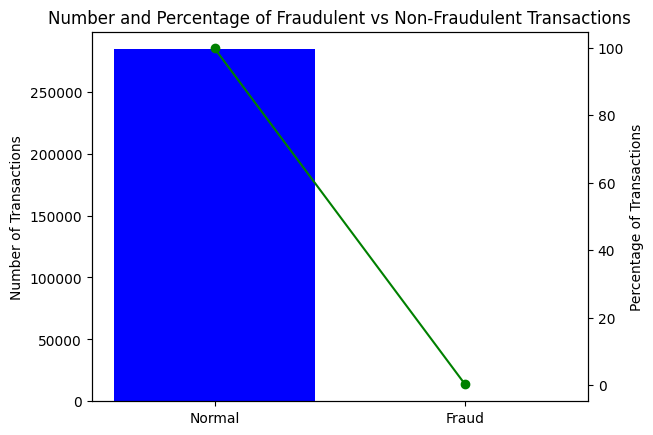

In [45]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
fig, ax1 = plt.subplots()

# Bar plot for the number of transactions
ax1.bar(['Normal', 'Fraud'], classes, color=['blue', 'red'])
ax1.set_ylabel('Number of Transactions')
ax1.set_title('Number and Percentage of Fraudulent vs Non-Fraudulent Transactions')

# Create a second y-axis for the percentage
ax2 = ax1.twinx()
ax2.plot(['Normal', 'Fraud'], [normal_share, fraud_share], color='green', marker='o')
ax2.set_ylabel('Percentage of Transactions')

# Show the plot
plt.show()

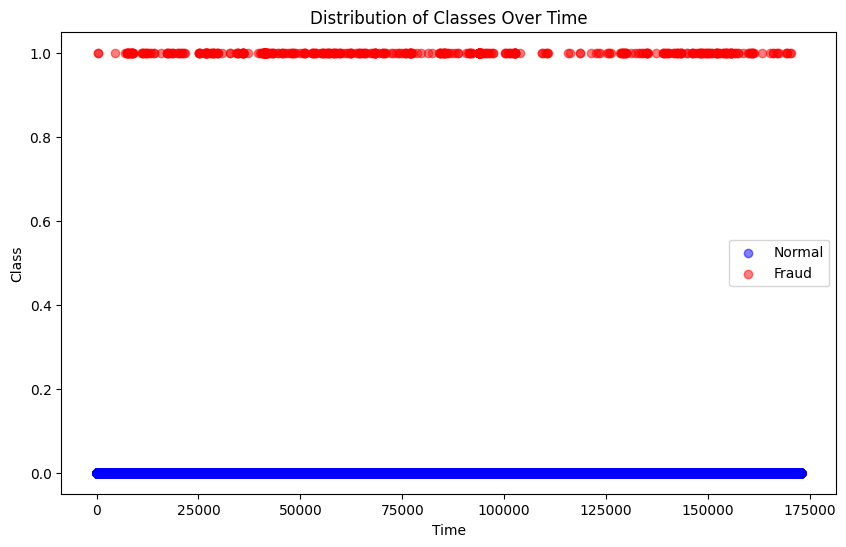

In [46]:
# Create a scatter plot to observe the distribution of classes with time

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Class'] == 0]['Time'], df[df['Class'] == 0]['Class'], label='Normal', alpha=0.5, c='blue')
plt.scatter(df[df['Class'] == 1]['Time'], df[df['Class'] == 1]['Class'], label='Fraud', alpha=0.5, c='red')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Class')
plt.title('Distribution of Classes Over Time')
plt.legend()

# Show the plot
plt.show()


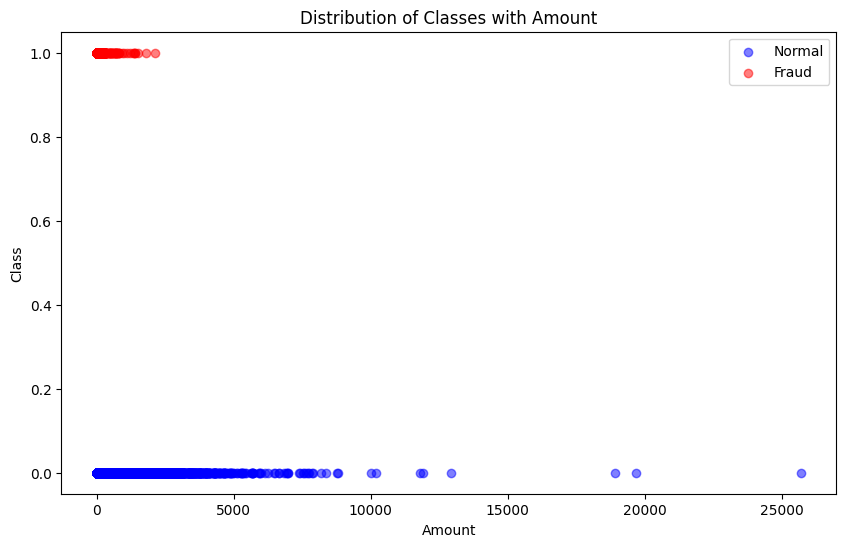

In [47]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Class'] == 0]['Amount'], df[df['Class'] == 0]['Class'], label='Normal', alpha=0.5, c='blue')
plt.scatter(df[df['Class'] == 1]['Amount'], df[df['Class'] == 1]['Class'], label='Fraud', alpha=0.5, c='red')

# Add labels and title
plt.xlabel('Amount')
plt.ylabel('Class')
plt.title('Distribution of Classes with Amount')
plt.legend()

# Show the plot
plt.show()

In [48]:
# Drop unnecessary columns

In [49]:
#Lets check for the percentage of the missing values in each of the columns
null_cols = df.isnull().mean()*100
null_cols

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [50]:
#We can check for columns with unique values. With many unique values we cannot do any kind of analysis. So we can drop those columns which are having many unique values.
df.dtypes.to_frame ('data_type').join (df.nunique ().div (len (df)).mul (100).to_frame ('unique_percentage')).sort_values(by='unique_percentage',ascending=False)

,data_type,unique_percentage
V15,float64,96.789405
V28,float64,96.789405
V26,float64,96.789405
V25,float64,96.789405
V24,float64,96.789405
V23,float64,96.789405
V22,float64,96.789405
V21,float64,96.789405
V20,float64,96.789405
V19,float64,96.789405


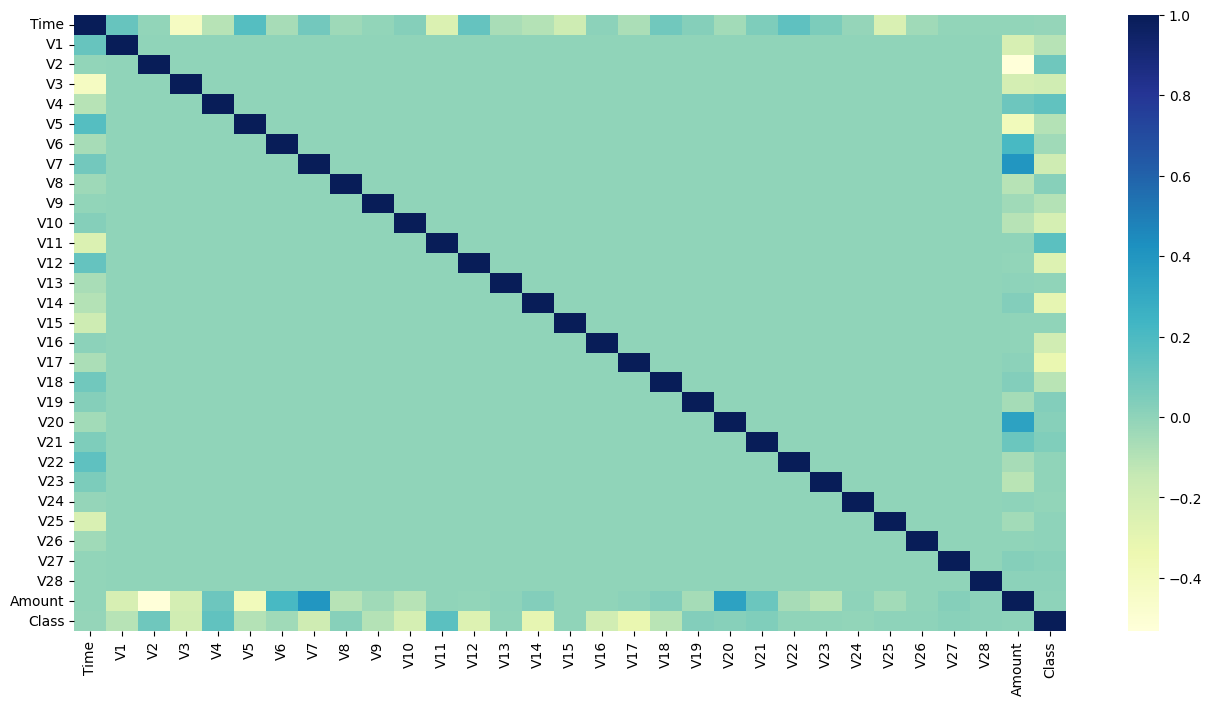

In [51]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=False)
plt.show()

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Use a simple model for recursive feature elimination
model = LinearRegression()
selector = RFE(model, n_features_to_select=15)  # Select the top X features from the already transformed PCA columns
df_pca = df.drop(columns=['Time', 'Class', 'Amount']) # we need to keep Time and Amount columns as they are clearly important
selector = selector.fit(df_pca, df['Class'])  # Provide your target variable

# Check selected features
selected_columns = df_pca.columns[selector.support_].tolist()
print("Selected features:", selected_columns)

Selected features: ['V1', 'V2', 'V3', 'V4', 'V5', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V21']


In [53]:
# We can see from the RFE and the heatmap that the selected features do have some correlation with the target variable
df = df[selected_columns + ['Time', 'Amount', 'Class']]

In [54]:
df.head()

,V1,V2,V3,V4,V5,V7,V9,V10,V11,V12,V14,V16,V17,V18,V21,Time,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,-0.018307,0.0,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.225775,0.0,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0.247998,1.0,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-0.108300,1.0,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,-0.009431,2.0,69.99,0


### Splitting the data into train & test data

In [55]:
y= 'Class' #class variable

In [56]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

X_train, X_test, y_train, y_test = df_train.drop(y, axis=1), df_test.drop(y, axis=1), df_train[y], df_test[y]

In [57]:
X_train.shape, X_test.shape

((199364, 17), (85443, 17))

In [58]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_train:", y_train.shape)

Shape of y_test: (85443,)
Shape of y_train: (199364,)


### Plotting the distribution of a variable

In [59]:
# check the dataset to see the skewness
skness = X_train.skew().sort_values(ascending=False)
skness

Amount    14.979320
V21        3.795331
V10        1.242401
V4         0.687606
V9         0.555865
V11        0.361309
Time      -0.033749
V18       -0.269310
V5        -0.357329
V7        -0.610036
V16       -1.150954
V14       -1.985748
V3        -2.115529
V12       -2.279765
V1        -3.234909
V17       -4.017280
V2        -4.722412
dtype: float64

In [60]:
X_train.Amount.describe()

count    199364.000000
mean         88.915795
std         249.849834
min           0.000000
25%           5.630000
50%          22.000000
75%          77.750000
max       19656.530000
Name: Amount, dtype: float64

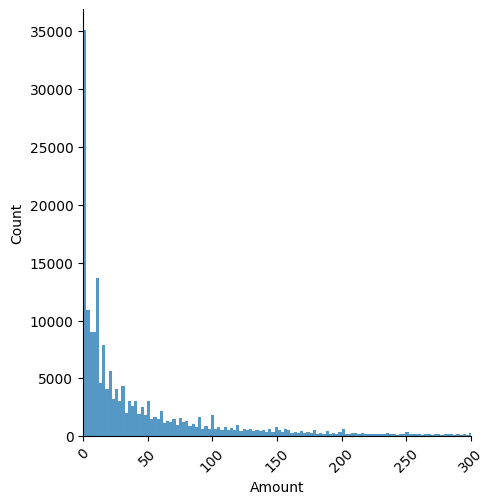

In [61]:
# lets plot Amount as it is highly skewed
sns.displot(X_train.Amount)
plt.xticks(rotation=45)
plt.xlim(0, 300)
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [62]:
# Initialize PowerTransformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')  # Use 'box-cox' for positive-only data

# Fit and transform
transformed_train = pt.fit_transform(X_train)

# Convert back to DataFrame for readability
transformed_train_df = pd.DataFrame(transformed_train, columns=X_train.columns)

transformed_train_df

,V1,V2,V3,V4,V5,V7,V9,V10,V11,V12,V14,V16,V17,V18,V21,Time,Amount
0,0.598470,-0.076635,0.414364,0.017924,-0.150960,-0.423005,1.152344,-0.468132,2.711654,-1.044975,1.988839,-0.153792,0.752506,-0.799254,-0.217742,-1.977762,-1.853467
1,1.445565,-0.134373,-0.902690,0.208193,0.136115,0.073299,0.277355,0.257359,0.627815,1.546125,0.317871,0.165528,-0.886526,-0.347125,-0.355324,0.730062,-1.446662
2,0.843049,-0.987411,-0.652970,-1.919788,0.423178,-1.478071,-1.629738,1.315947,-0.265160,-1.117650,-0.502524,0.141712,-0.192826,1.001148,-0.009865,-0.254749,0.706491
3,-0.326321,0.805913,-0.366669,-0.296532,0.512231,0.794658,0.130993,-0.479100,-0.135555,0.007221,-1.148253,0.046717,0.670351,-0.599578,-0.457294,1.193842,-1.576187
4,0.566536,-0.144094,0.637616,0.445581,-0.564414,-0.482081,0.269297,0.107031,1.543871,0.577842,0.455308,0.485489,-0.496743,-0.071757,0.013937,-0.980315,-0.715547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199359,-0.630632,0.215177,0.615233,-1.155230,-0.623146,-1.910661,-1.147246,-0.127379,0.667226,0.393079,0.059572,1.838786,0.231156,-0.727156,0.740673,0.923455,0.497641
199360,-1.383668,-1.226642,0.267430,-0.867011,0.800285,-0.609117,-1.648254,0.134915,1.153479,0.093762,1.051628,-1.511645,0.357779,0.268543,-0.712798,-0.869612,0.282765
199361,-1.081839,-0.417713,-0.334442,0.434180,-0.317791,3.256841,-1.527315,-1.024901,0.625211,-0.018003,0.995522,-0.569167,-0.594396,0.467412,0.818014,1.242676,1.895448
199362,-0.460376,0.582313,0.031611,0.346307,0.443842,0.777128,0.101595,-0.033021,-1.182870,-0.396816,0.075588,-0.404745,-0.618121,-0.128648,0.397357,0.906129,-1.268556


In [63]:
# transform the test data
transformed_test_data = pt.transform(X_test)
# Convert back to DataFrame for readability
transformed_test_df = pd.DataFrame(transformed_test_data, columns=X_test.columns)


In [64]:
# check the transformed dataset to see the skewness
skness = transformed_train_df.skew().sort_values(ascending=False)
skness

V7        0.523162
V2        0.327536
V12       0.165385
V14       0.108570
V11       0.062110
V16       0.031705
Amount    0.018434
V4        0.018000
V9       -0.041243
V18      -0.061911
V3       -0.076278
V1       -0.217901
Time     -0.227865
V5       -0.259222
V17      -0.769422
V10      -1.225595
V21      -2.097909
dtype: float64

In [65]:
transformed_train_df.Amount.describe()

count    1.993640e+05
mean     1.036781e-16
std      1.000003e+00
min     -2.013797e+00
25%     -7.493653e-01
50%      2.522663e-02
75%      7.500678e-01
max      3.548822e+00
Name: Amount, dtype: float64

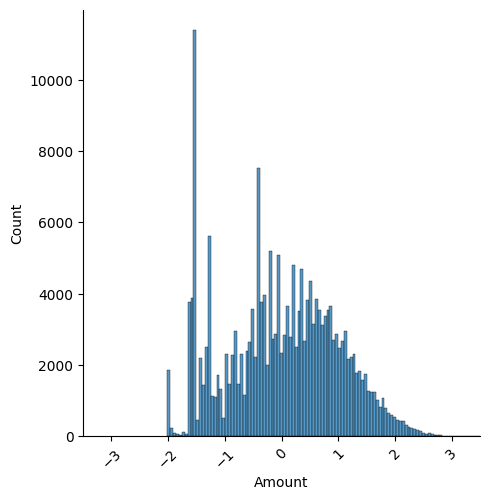

In [66]:
# plot the histogram of Amount again to see the result 
sns.displot(transformed_train_df.Amount)
plt.xticks(rotation=45)
plt.xlim(-3.5, 3.5)
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

Logistic Regression on StratifiedKFold with HyperParameter Tuning

In [67]:
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Optimization algorithms
    'penalty': ['l2'],  # Regularization type
    # Note: 'penalty' should match the solver (e.g., 'l2' is supported by both 'liblinear' and 'lbfgs')
}

# Define the stratified K-fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='accuracy',  # Scoring metric to optimize
    cv=skf,  # Use stratified cross-validation
    verbose=1,  # Print progress
    n_jobs=-1  # Use all processors
)

# Fit the grid search to the data
grid_search.fit(transformed_train_df, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate the model on the full dataset using the best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(transformed_train_df)
print("Accuracy on full dataset:", accuracy_score(y_train, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation accuracy: 0.9993077984981932
Accuracy on full dataset: 0.999297766898738


In [68]:
y_pred_test = best_model.predict(transformed_test_df)
print("Accuracy on test dataset:", accuracy_score(y_test, y_pred_test))

Accuracy on test dataset: 0.9991222218320986


AUC: 0.96


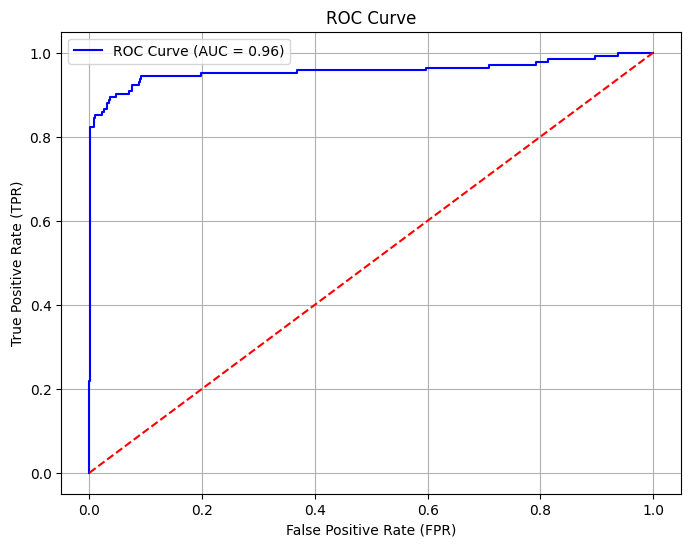

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(model, X_test, y_test):
    # Get predicted probabilities for the positive class
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Calculate FPR, TPR, and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Compute AUC
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC: {roc_auc:.2f}")

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random classifier line
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid()
    plt.show()

# plot ROC curve
plot_roc_curve(best_model, transformed_test_df, y_test)

### Similarly explore other algorithms by building models like:
- KNN
- Random Forest
- XGBoost

KNN on the same Strartified K  Fold

In [33]:
from sklearn.neighbors import KNeighborsClassifier
# Hyperparameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting method
    'p': [1, 2]  # Distance metric: Manhattan (1) or Euclidean (2)
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=skf, scoring='accuracy')
grid_search.fit(transformed_train_df, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
0.999543548006091


In [34]:
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(transformed_test_df)
print("Accuracy on test dataset:", accuracy_score(y_test, y_pred_test))

Accuracy on test dataset: 0.9994850368081645


AUC: 0.91


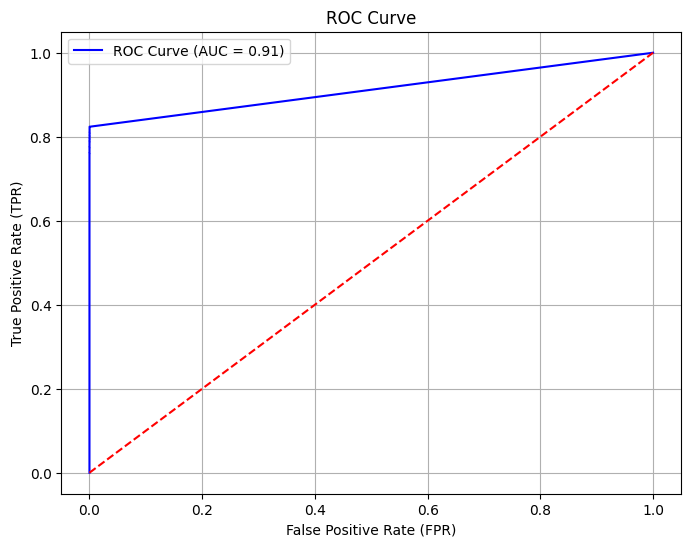

In [38]:
# plot ROC curve
plot_roc_curve(best_model, transformed_test_df, y_test)

Random Forest model on the same K Fold data

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid for Random Forest

param_grid = {
    'n_estimators': [50, 100],  
    'max_depth': [10, 20],  
    'min_samples_split': [5, 10], 
    'min_samples_leaf': [2, 4],  
    'max_features': ['sqrt']  # Use a single feature selection strategy
}


# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV. Use a small number of iterations to save time
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,  # Number of random combinations to try
    cv=skf,
    verbose=1,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search.fit(transformed_train_df, y_train)


# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)


Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}
Best Cross-Validation Accuracy: 0.9995435477544896


In [72]:
best_model = random_search.best_estimator_
y_pred_test = best_model.predict(transformed_test_df)
print("Accuracy on test dataset:", accuracy_score(y_test, y_pred_test))

Accuracy on test dataset: 0.9993797034280163


AUC: 0.98


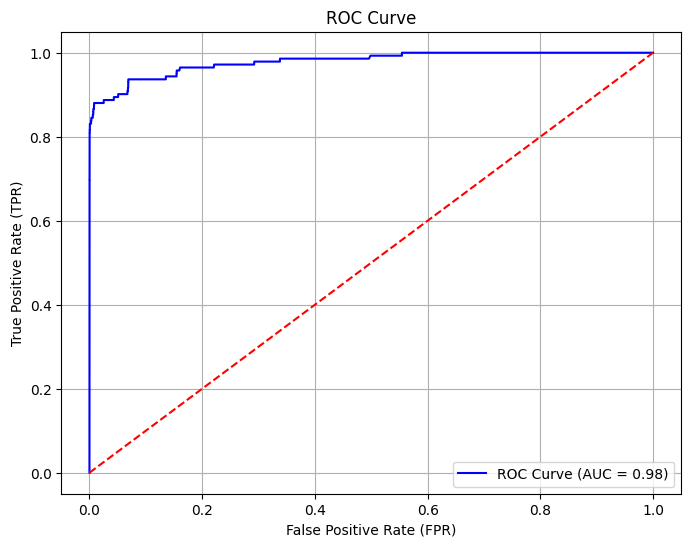

In [73]:
# plot ROC curve
plot_roc_curve(best_model, transformed_test_df, y_test)

Lets us now try XGBoost

In [76]:
from xgboost import XGBClassifier

# Parameter grid for XGBoost
param_distributions = {
    'n_estimators': [50, 100],  # Number of trees
    'max_depth': [5, 10],           # Maximum depth of the trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],         # Fraction of samples used per tree
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features used per tree
    'gamma': [0, 1, 5],                   # Minimum loss reduction for split
    'reg_alpha': [0, 0.1, 1],             # L1 regularization
    'reg_lambda': [1, 1.5, 2],            # L2 regularization
}

# Define XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Number of iterations for RandomizedSearchCV
n_iter = 40  # Reduce this for faster runtime

random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_distributions,
    n_iter=n_iter,
    scoring='accuracy',
    cv=skf,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Parallel processing
)

# Fit the model
print("Starting RandomizedSearchCV for XGBoost...")
random_search_xgb.fit(transformed_train_df, y_train)

print("Best Parameters:", random_search_xgb.best_params_)
print("Best Score:", random_search_xgb.best_score_)


Starting RandomizedSearchCV for XGBoost...
Fitting 5 folds for each of 40 candidates, totalling 200 fits


c:\Users\anila\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:59:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 0.8, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8}
Best Score: 0.9995435485092938


In [77]:
best_model = random_search.best_estimator_
y_pred_test = best_model.predict(transformed_test_df)
print("Accuracy on test dataset:", accuracy_score(y_test, y_pred_test))

Accuracy on test dataset: 0.9993797034280163


AUC: 0.98


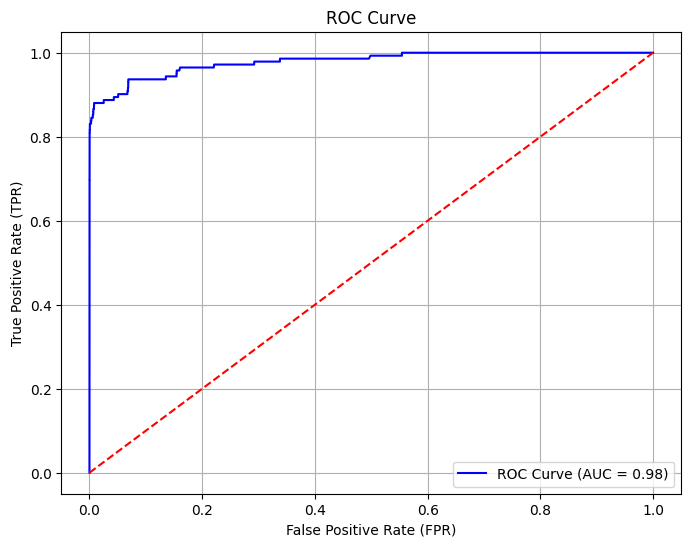

In [78]:
# plot ROC curve
plot_roc_curve(best_model, transformed_test_df, y_test)

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

AUC scores of the best models after hyperpamameter tuning on Startified K Fold:
- XGBoost 0.98
- Random Forest 0.98
- KNN 0.91
- Logistic Regression 0.96

XGBoost is the best model with 0.98 AUC and hyper parameters as follows:
- 'subsample': 0.8, 
- 'reg_lambda': 1.5, 
- 'reg_alpha': 0, 
- 'n_estimators': 100, 
- 'max_depth': 5, 
- 'learning_rate': 0.2, 
- 'gamma': 0, 
- 'colsample_bytree': 0.8

While Random Forest also gave a similar AUC score but it takes significantly longer time.

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [79]:
# Get feature importances from the best model
importances = best_model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances)

   Feature  Importance
12     V17    0.282612
9      V12    0.160843
10     V14    0.133427
7      V10    0.082214
8      V11    0.080252
11     V16    0.058918
6       V9    0.039384
5       V7    0.027030
13     V18    0.024247
3       V4    0.022884
14     V21    0.019674
2       V3    0.014227
0       V1    0.013141
15    Time    0.012850
4       V5    0.010842
1       V2    0.008753
16  Amount    0.008702


## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = ______  #--> list of values
cv_num =   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [ ]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Print the class distribution after applying SMOTE 

In [ ]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)